# How to use STAREpandas.
Here we'll work with a basic polygon formed from a series of (lat, lon) coordinate-pairs and use the `STAREpandas` Pandas-based API to access the `STARE` toolkit.

The primary reason to use `pySTARE` rather than `STAREpandas` is when your use-case can be done exclusively via Numpy and Python data structures (lists, dictionaries etc.). `STAREpandas` by contrast, is an extension of GeoPandas, which is an extension of Pandas, and comes with all the tools and workflows that come with this heritage. We will now repeat the previous analysis using `STAREpandas`.

The first steps are the same as before; gather a list of vertices and make a polygon. After this, we can do all the remaining steps in a single `STAREpandas` operation which also creates a polygon representation of the trixels for plotting. This creates a `STAREpandas` dataframe for each polygon.

In [1]:
# Standard Imports

# Third-Party Imports
import numpy as np
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import dask

# STARE Imports
import starepandas
# ------------------------------------------------------------------------------

LON_180 = lambda x: ((x + 180.0) % 360.0) - 180.0
LON_360 = lambda x: ((x + 360.0) % 360.0)

`STAREpandas` uses [Dask](https://docs.dask.org/en/stable/index.html) to handle parallel and distributed computing. In our case we set things up for a single CPU with `NCORES`. If we were using a cluster we could set `NCPU` to a higher value for even better performance.

In [2]:
##
# Tell Dask to and how to use its resources
dask.config.set(scheduler='processes')

##
# Options for Dask and multiprocessing
# ------------------------------------
#   `NCPU` is passed to STARE tools for a parameter `n_partitions`.
#        n_partitions: Internally, a Dask DataFrame is split into n_partitions, where each partition is one Pandas DataFrame.
#                      These DataFrames are split vertically along the index (i.e., a row).
#   `NCORES` is passed to STARE tools for a parameter `n_workers`.
#        n_workers   : Number of processor cores to use with Dask
NCPU = 1
NCORES = 6

The first steps are the same as used in the `pySTARE` tutorial; gather a list of vertices and make a polygon. After this, we can do all the remaining steps in a single `STAREPandas` operation which also creates a polygon representation of the trixels for plotting. This creates a `STAREPandas` dataframe for each polygon.

In [3]:
##
# Example Polygon Vertices
geo_lons_180 = [-5.0, -5.0, 20.0, 20.0]
geo_lats = [68.0, 56.0, 56.0, 68.0]

##
# Form polygon (refered to as Polygon-A)
verts_180 = [(float(geo_lons_180[_]), float(geo_lats[_])) for _ in range(len(geo_lons_180))]
poly_180 = Polygon(verts_180)

geob_lons_180 = [15.0, 15.0, 30.0, 30.0]
geob_lats = [66.0, 60.0, 60.0, 66.0]
vertsb_180 = [(float(geob_lons_180[_]), float(geob_lats[_])) for _ in range(len(geob_lons_180))]
polyb_180 = Polygon(vertsb_180)

geoc_lons_180 = [0.0, 90.0, 180.0, -90.0]
geoc_lats = [80.0, 80.0, 80.0, 80.0]
vertsc_180 = [(float(geoc_lons_180[_]), float(geoc_lats[_])) for _ in range(len(geoc_lons_180))]
polyc_180 = Polygon(vertsc_180)

##
# Create a STARE DataFrames
q_level = 10
spdf = starepandas.STAREDataFrame({'lons': geo_lons_180, 'lats': geo_lats, 'geometry': poly_180},
                                   add_sids=True, level=q_level, add_trixels=True, n_partitions=NCPU)
spdfb = starepandas.STAREDataFrame({'lons': geob_lons_180, 'lats': geob_lats, 'geometry': polyb_180},
                                    add_sids=True, level=q_level, add_trixels=True, n_partitions=NCPU)
spdfc = starepandas.STAREDataFrame({'lons': geoc_lons_180, 'lats': geoc_lats, 'geometry': polyc_180},
                                    add_sids=True, level=q_level, add_trixels=True, n_partitions=NCPU)

print(spdf.head())

   lons  lats                                       geometry  \
0  -5.0  68.0  POLYGON ((-5 68, -5 56, 20 56, 20 68, -5 68))   
1  -5.0  56.0  POLYGON ((-5 68, -5 56, 20 56, 20 68, -5 68))   
2  20.0  56.0  POLYGON ((-5 68, -5 56, 20 56, 20 68, -5 68))   
3  20.0  68.0  POLYGON ((-5 68, -5 56, 20 56, 20 68, -5 68))   

                                                sids  \
0  [3643412098542731268, 3659174697238528004, 366...   
1  [3643412098542731268, 3659174697238528004, 366...   
2  [3643412098542731268, 3659174697238528004, 366...   
3  [3643412098542731268, 3659174697238528004, 366...   

                                             trixels  
0  MULTIPOLYGON (((6.70894 59.96536, 17.91495 59....  
1  MULTIPOLYGON (((6.70894 59.96536, 17.91495 59....  
2  MULTIPOLYGON (((6.70894 59.96536, 17.91495 59....  
3  MULTIPOLYGON (((6.70894 59.96536, 17.91495 59....  


In [4]:
polya_sids = spdf['sids'].iloc[0]
print(f"Q-{q_level:02d} Poly-A SIDs ({len(polya_sids)}): [{polya_sids[0]}, {polya_sids[1]}, ... {polya_sids[-1]}]")

polyb_sids = spdfb['sids'].iloc[0]
print(f"Q-{q_level:02d} Poly-B SIDs ({len(polyb_sids)}): [{polyb_sids[0]}, {polyb_sids[1]}, ... {polyb_sids[-1]}]")

polyc_sids = spdfc['sids'].iloc[0]
print(f"Q-{q_level:02d} Poly-C SIDs ({len(polyc_sids)}): [{polyc_sids[0]}, {polyc_sids[1]}, ... {polyc_sids[-1]}]")


Q-10 Poly-A SIDs (1975): [3643412098542731268, 3659174697238528004, ... 4285042554291879946]
Q-10 Poly-B SIDs (1037): [3639471448868782085, 3646789798263259141, ... 3898990827640193034]
Q-10 Poly-C SIDs (1451): [4014959067800797188, 3910250376464433157, ... 4034097167193866250]


A nice property of `STAREpandas` is that it affords easy plotting of the trixels (SIDs). Here using the encoding at Q-10 (~10 km).

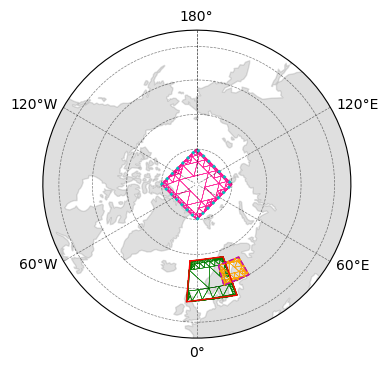

In [5]:
##
# Make Figure
# --------------------------------------------------------------------------
map_extent = [-180, 180, 45, 90]
lon_0_global = 0.0

# WGS-84 Earth equatorial radius at sea level (meters)
globe = ccrs.Globe(datum='WGS84', ellipse='WGS84')

# Geodetic:
#   A 3D/spherical CRS based on latitude and longitude where geographical distance and coordinates are measured in degrees.
geod_crs = ccrs.Geodetic(globe=globe)

# PlateCarree Projection (AKA Equirectangular or Equidistant Cylindrical):
#   A 2D CRS with a flat topology and Euclidean distance (m).
flat_crs = ccrs.PlateCarree(central_longitude=lon_0_global, globe=globe)

# Lambert Azimuthal Equal-Area
#   A 2D CRS centered on (map_lat0, map_lon0), which is then the zero point of the flat topology w/ Euclidean distance (m).
polar_crs = ccrs.LambertAzimuthalEqualArea(central_longitude=lon_0_global, central_latitude=90.0)

fig = plt.figure(figsize=(12, 4), frameon=True)
geo_axes = plt.axes(projection=polar_crs)
geo_axes.set_extent(map_extent, flat_crs)
geo_axes.add_feature(cfeature.LAND, color='grey', alpha=0.25)
gl = geo_axes.gridlines(draw_labels=True, linewidth=.5, color='k', alpha=0.5, linestyle='--')

geo_axes.plot(*poly_180.exterior.xy, 'r-', linewidth=1, markersize=1, transform=geod_crs)
geo_axes.plot(*polyb_180.exterior.xy, 'm--', linewidth=1, markersize=1, transform=geod_crs)
geo_axes.plot(*polyc_180.exterior.xy, 'c:', linewidth=2, markersize=1, transform=geod_crs)

spdf.plot(trixels=True, boundary=True, ax=geo_axes, figsize=(12, 4), aspect=None, zorder=1,
          linewidth=0.25, color="g", alpha=0.6, transform=geod_crs)
spdfb.plot(trixels=True, boundary=True, ax=geo_axes, figsize=(12, 4), aspect=None, zorder=1,
           linewidth=0.25, color="orange", alpha=0.6, transform=geod_crs)
spdfc.plot(trixels=True, boundary=True, ax=geo_axes, figsize=(12, 4), aspect=None, zorder=1,
           linewidth=0.25, color="deeppink", alpha=0.6, transform=geod_crs)

# Trim plot
theta = np.linspace(0.0, 2.0 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
geo_axes.set_boundary(circle, transform=geo_axes.transAxes)

plt.show()

Note in the resulting image how the trixels are of varying size and indeed in the last operation we found that the original polygon SIDs have `STARE` levels ranging from 4 to our requested level 10 (length scales from 10 to 640 km). This represents the adaptive multi-level nature of the `STARE` encoding of the polygon; using the largest (lowest level) trixels for large interior regions and the smallest (highest level) trixels near the corner edges of the polygon.

In this we can actually see our previous result that only polygons A and B intersect, and this is only a partial intersection. Using `STAREpandas` we can isolate and image this intersection.

In [6]:
test_spdf = starepandas.STAREDataFrame(sids=[polya_sids])
intersectab = test_spdf.stare_intersects(polyb_sids, n_partitions=NCPU, num_workers=NCORES).iloc[0]
print(f"Q-{q_level:02d} Poly-A intersects with Poly-B: {intersectab}")
if intersectab:
    unionab = test_spdf.stare_intersection(polyb_sids).iloc[0]
    print(f"Q-{q_level:02d} Poly-A intersection with Poly-B ({len(unionab)}): [{unionab[0]}, {unionab[1]}, ... {unionab[-1]}]")

intersectac = test_spdf.stare_intersects(polyc_sids, n_partitions=NCPU, num_workers=NCORES).iloc[0]
print(f"\nQ-{q_level:02d} Poly-A intersects with Poly-C: {intersectac}")
if intersectac:
    unionac = test_spdf.stare_intersection(polyc_sids).iloc[0]
    print(f"Q-{q_level:02d} Poly-A intersection with Poly-C ({len(unionac)}): [{unionac[0]}, {unionac[1]}, ... {unionac[-1]}]")

Q-10 Poly-A intersects with Poly-B: True
Q-10 Poly-A intersection with Poly-B (312): [3640051991008247816, 3640078379287314441, ... 3647774960681746438]

Q-10 Poly-A intersects with Poly-C: False


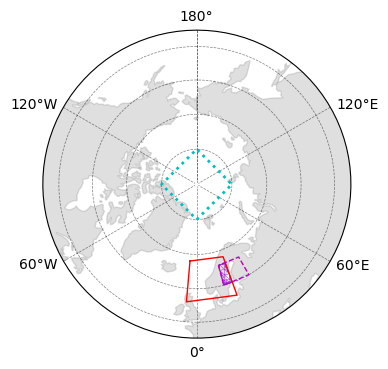

In [7]:
##
# Make Figure
# --------------------------------------------------------------------------
fig = plt.figure(figsize=(12, 4), frameon=True)
geo_axes = plt.axes(projection=polar_crs)
geo_axes.set_extent(map_extent, flat_crs)
geo_axes.add_feature(cfeature.LAND, color='grey', alpha=0.25)
gl = geo_axes.gridlines(draw_labels=True, linewidth=.5, color='k', alpha=0.5, linestyle='--')

geo_axes.plot(*poly_180.exterior.xy, 'r-', linewidth=1, markersize=1, transform=geod_crs)
geo_axes.plot(*polyb_180.exterior.xy, 'm--', linewidth=1, markersize=1, transform=geod_crs)
geo_axes.plot(*polyc_180.exterior.xy, 'c:', linewidth=2, markersize=1, transform=geod_crs)

sdf_ = starepandas.STAREDataFrame(sids=unionab)
spf_trixels = sdf_.make_trixels(wrap_lon=False)
sdf_.set_trixels(spf_trixels, inplace=True)
sdf_.plot(trixels=True, boundary=True, ax=geo_axes, figsize=(12, 4), aspect=None, zorder=1,
          linewidth=0.25, color="darkviolet", alpha=0.6, transform=geod_crs)

# Trim plot
theta = np.linspace(0.0, 2.0 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
geo_axes.set_boundary(circle, transform=geo_axes.transAxes)

plt.show()

With this we have demonstrated core `STARE` ideas of using `STAREpandas`. 

**Author:** [Mike Bauer](mbauer@bayesics.com)

**Last update:** 03-April-2025 (Created: 03-April-2025)